In [1]:
!pip install qiskit_aer
!pip install qiskit_ibm_runtime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from qiskit import *
from qiskit.visualization import *
from qiskit_ibm_runtime import *

service = QiskitRuntimeService()



In [2]:
# Select the backend 
backend_name = 'ibm_brisbane'
backend = service.backend(backend_name)

# Get the backend properties
properties = backend.properties()

# Display the properties
print(properties)

In [3]:
df = pd.read_csv("ibm_brisbane_calibrations_2024-10-11T13_37_10Z.csv")

# Access a specific column by its name
prob_measure_0_prep1 = df["Prob meas0 prep1 "]

prob_measure_1_prep0 = df["Prob meas1 prep0 "] 

# Convert the column to a list if needed
meas0prep1_list = prob_measure_0_prep1.tolist()
meas1prep0_list = prob_measure_1_prep0.tolist()

print(prob_measure_0_prep1)
print(prob_measure_1_prep0)

t1_values = []
t2_values = []
frequency_values = []
anharmonicity_values = []
readout_assignment_error = []
sx_gate_error = []

qubits = properties.qubits
num_qubits = len(qubits)

# Loop through qubits to extract properties
for qubit in range(num_qubits):
    qubit_properties = properties.qubit_property(qubit)
    t1 = properties.t1(qubit)
    t2 = properties.t2(qubit)
    frequency = properties.frequency(qubit)
    anharmonicity = qubit_properties.get('anharmonicity', None)[0]

    t1_values.append(t1)
    t2_values.append(t2)
    frequency_values.append(frequency)
    anharmonicity_values.append(anharmonicity)

    # Readout assignment error (typically taken from the readout error section)
    readout_error = properties.readout_error(qubit)
    readout_assignment_error.append(readout_error)

    # Gate error (specific to the SX gate)
    sx_error = properties.gate_error('sx', qubit)
    sx_gate_error.append(sx_error)

# Create a DataFrame for better analysis
data = {
    'Qubit': range(num_qubits),
    'T1': t1_values,
    'T2': t2_values,
    'Frequency (GHz)': frequency_values,
    'Anharmonicity (GHz)': anharmonicity_values,
    'Readout Assignment Error': readout_assignment_error,
    'SX Gate Error': sx_gate_error,
    'Prob meas 0 prep1': meas0prep1_list,
    'Prob meas 1 prep0': meas1prep0_list
}

df = pd.DataFrame(data)

df['T1'] = pd.to_numeric(df['T1'], errors='coerce')
df['T2'] = pd.to_numeric(df['T2'], errors='coerce')


# Check again the data types
print(df.dtypes)
print(df)

0      0.0218
1      0.0428
2      0.0102
3      0.0152
4      0.0194
        ...  
122    0.0196
123    0.0128
124    0.0074
125    0.0524
126    0.0090
Name: Prob meas0 prep1 , Length: 127, dtype: float64
0      0.0254
1      0.0478
2      0.0066
3      0.0434
4      0.0124
        ...  
122    0.0212
123    0.0098
124    0.0186
125    0.0092
126    0.0078
Name: Prob meas1 prep0 , Length: 127, dtype: float64
Qubit                         int64
T1                          float64
T2                          float64
Frequency (GHz)             float64
Anharmonicity (GHz)         float64
Readout Assignment Error    float64
SX Gate Error               float64
Prob meas 0 prep1           float64
Prob meas 1 prep0           float64
dtype: object
     Qubit        T1        T2  Frequency (GHz)  Anharmonicity (GHz)  \
0        0  0.000247  0.000063     4.721908e+09        -3.119787e+08   
1        1  0.000295  0.000254     4.815136e+09        -3.097440e+08   
2        2  0.000338  0.000281  

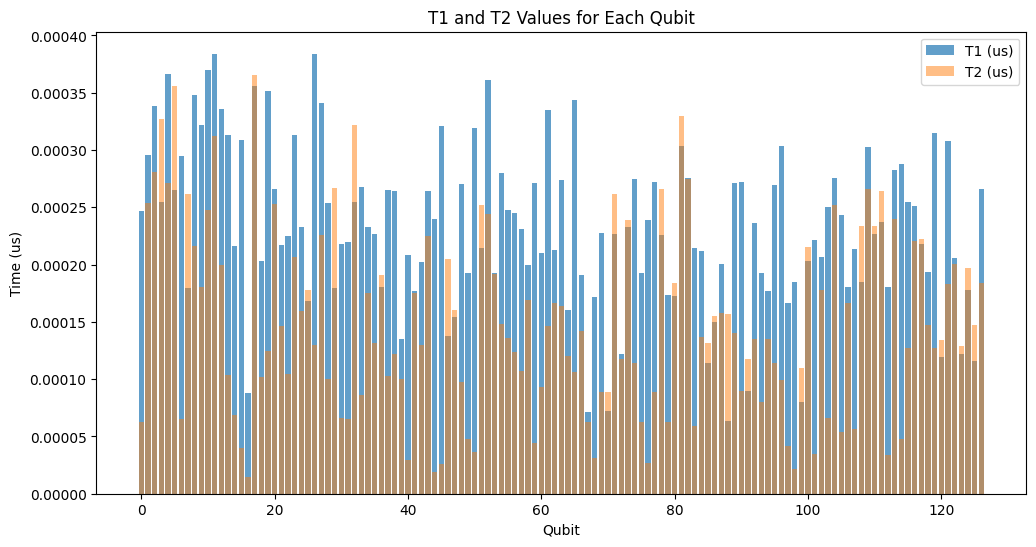

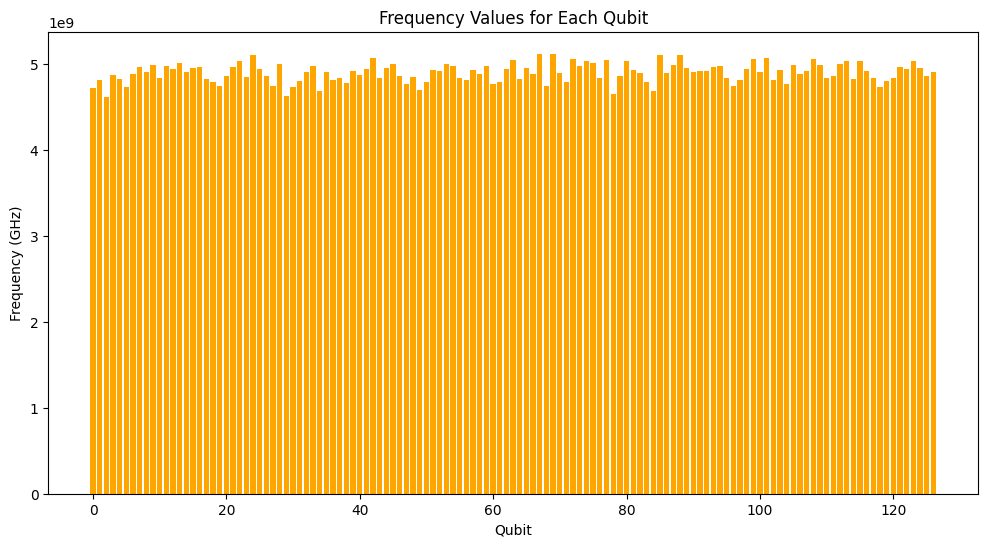

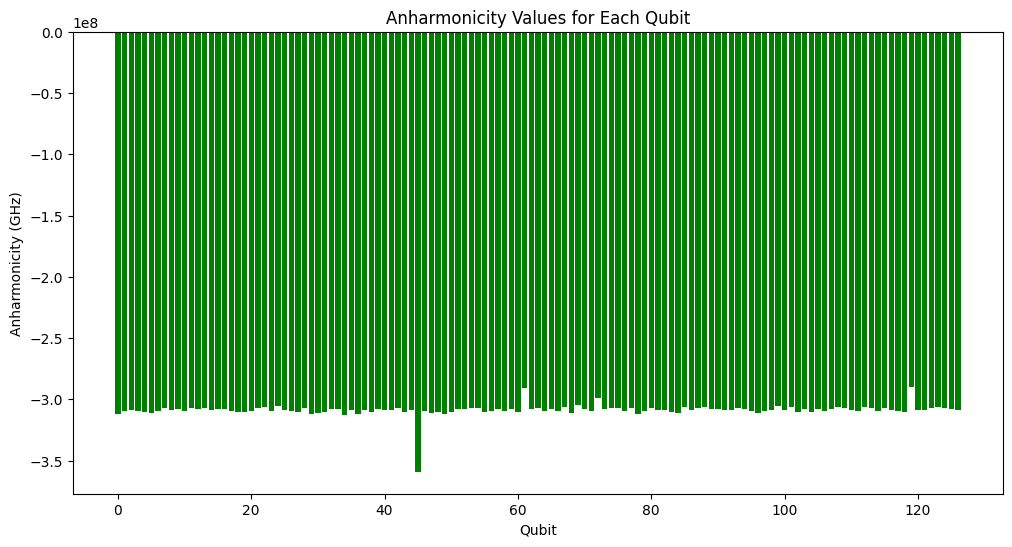

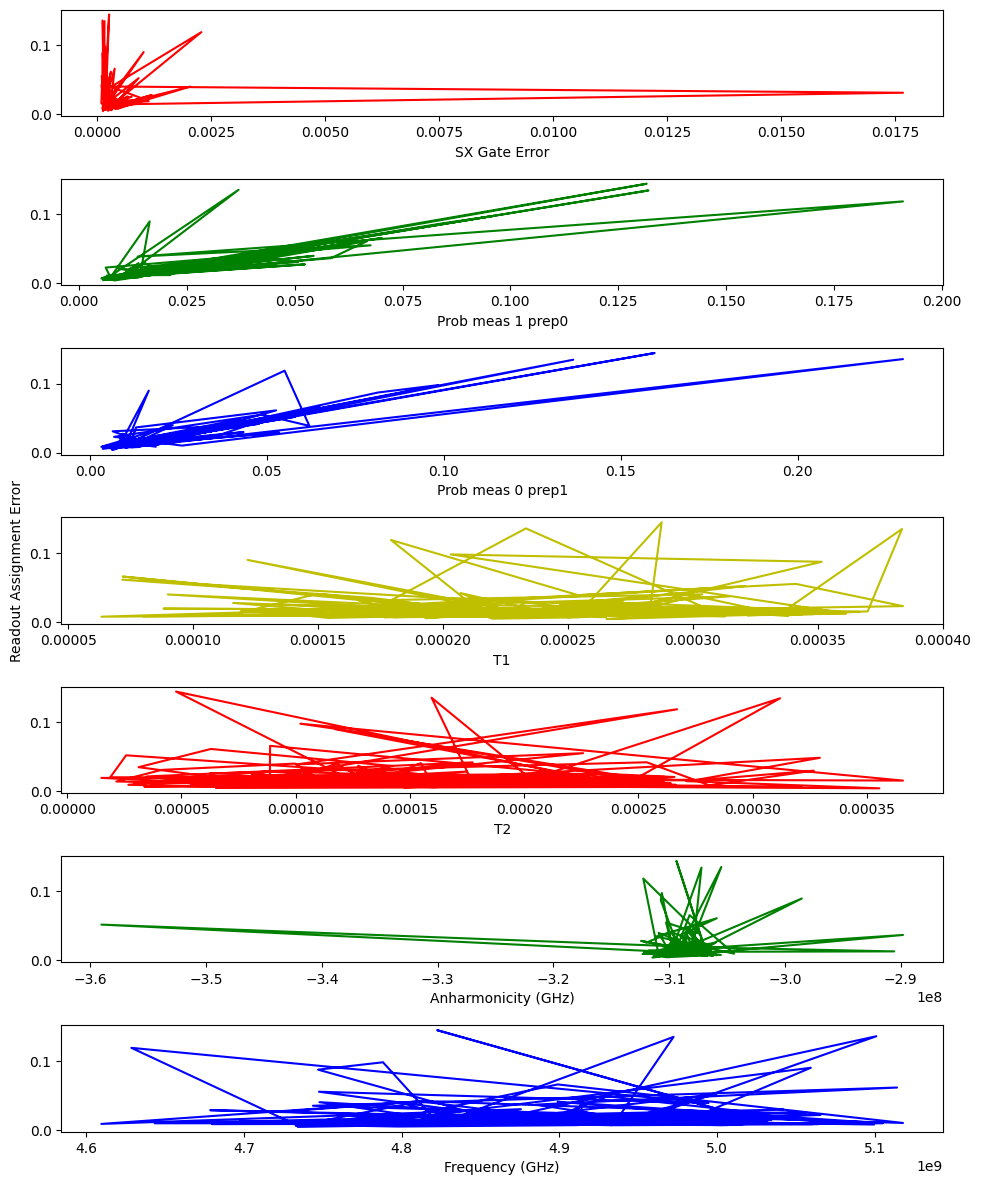

In [28]:
import matplotlib.pyplot as plt

# Plot T1 and T2 values
plt.figure(figsize=(12, 6))
plt.bar(df['Qubit'], df['T1'], label='T1 (us)', alpha=0.7)
plt.bar(df['Qubit'], df['T2'], label='T2 (us)', alpha=0.5)
plt.xlabel('Qubit')
plt.ylabel('Time (us)')
plt.title('T1 and T2 Values for Each Qubit')
plt.legend()
plt.show()

# Plot Frequency
plt.figure(figsize=(12, 6))
plt.bar(df['Qubit'], df['Frequency (GHz)'], label='Frequency (GHz)', color='orange')
plt.xlabel('Qubit')
plt.ylabel('Frequency (GHz)')
plt.title('Frequency Values for Each Qubit')
plt.show()

# Plot Anharmonicity
plt.figure(figsize=(12, 6))
plt.bar(df['Qubit'], df['Anharmonicity (GHz)'], label='Anharmonicity (GHz)', color='green')
plt.xlabel('Qubit')
plt.ylabel('Anharmonicity (GHz)')
plt.title('Anharmonicity Values for Each Qubit')
plt.show()

#Plot fidelity and noise factors against readout error
x = df['Readout Assignment Error']
y1 = df['SX Gate Error']
y2 = df['Prob meas 0 prep1']
y3 = df['Prob meas 1 prep0']
y4 = df['T1']
y5 = df['T2']
y6 = df['Anharmonicity (GHz)']
y7 = df['Frequency (GHz)']

# Create subplots
fig, axs = plt.subplots(7, 1, sharex=False, sharey=True, figsize=(10,12))

# Plot each dependent variable on a separate subplot
axs[0].plot(y1, x, 'r')
axs[0].set_xlabel('SX Gate Error')

axs[1].plot(y2, x, 'g')
axs[1].set_xlabel('Prob meas 1 prep0')

axs[2].plot(y3, x, 'b')
axs[2].set_xlabel('Prob meas 0 prep1')

axs[3].plot(y4, x, 'y')
axs[3].set_xlabel('T1')

axs[4].plot(y5, x, 'r')
axs[4].set_xlabel('T2')

axs[5].plot(y6, x, 'g')
axs[5].set_xlabel('Anharmonicity (GHz)')

axs[6].plot(y7, x, 'b')
axs[6].set_xlabel('Frequency (GHz)')

axs[3].set_ylabel('Readout Assignment Error')



# Show the plot 
plt.tight_layout()
plt.show()

In [5]:
columns_of_interest_noise = ['T1', 'T2', 'Frequency (GHz)', 'Anharmonicity (GHz)']
columns_of_interest_fidelity = ['Readout Assignment Error', 'SX Gate Error', 'Prob meas 0 prep1', 'Prob meas 1 prep0']

noise_subset_df = df[columns_of_interest_noise]
fidelity_subset_df = df[columns_of_interest_fidelity]
noise_correlation_matrix = noise_subset_df.corr()
fidelity_correlation_matrix = fidelity_subset_df.corr()

print("Noise Correlation Matrix:\n", noise_correlation_matrix)
print("Fidelity Correlation Matrix:\n", fidelity_correlation_matrix)


Noise Correlation Matrix:
                            T1        T2  Frequency (GHz)  Anharmonicity (GHz)
T1                   1.000000  0.275954        -0.204454            -0.095547
T2                   0.275954  1.000000        -0.157334             0.064408
Frequency (GHz)     -0.204454 -0.157334         1.000000             0.179237
Anharmonicity (GHz) -0.095547  0.064408         0.179237             1.000000
Fidelity Correlation Matrix:
                           Readout Assignment Error  SX Gate Error  \
Readout Assignment Error                  1.000000       0.076591   
SX Gate Error                             0.076591       1.000000   
Prob meas 0 prep1                         0.853348       0.170923   
Prob meas 1 prep0                         0.885888      -0.045221   

                          Prob meas 0 prep1  Prob meas 1 prep0  
Readout Assignment Error           0.853348           0.885888  
SX Gate Error                      0.170923          -0.045221  
Prob meas 0 